In [2]:
!pip install -q ultralytics

In [1]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video

In [2]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [3]:
model = YOLO('yolov8n.pt')

In [4]:
# Define the dataset_path
dataset_path = '/home/wockd/Desktop/trafic/plate_detect2'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- License_Plate
nc: 1
roboflow:
  license: CC BY 4.0
  project: license-plate-recognition-rxg4e
  url: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/11
  version: 11
  workspace: roboflow-universe-projects
test: ../test/images
train: ../train/images
val: ../valid/images



In [5]:
# Set paths for training and validation image sets
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'): 
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 7057
Number of validation images: 2048
Training images have varying sizes.
Validation images have varying sizes.


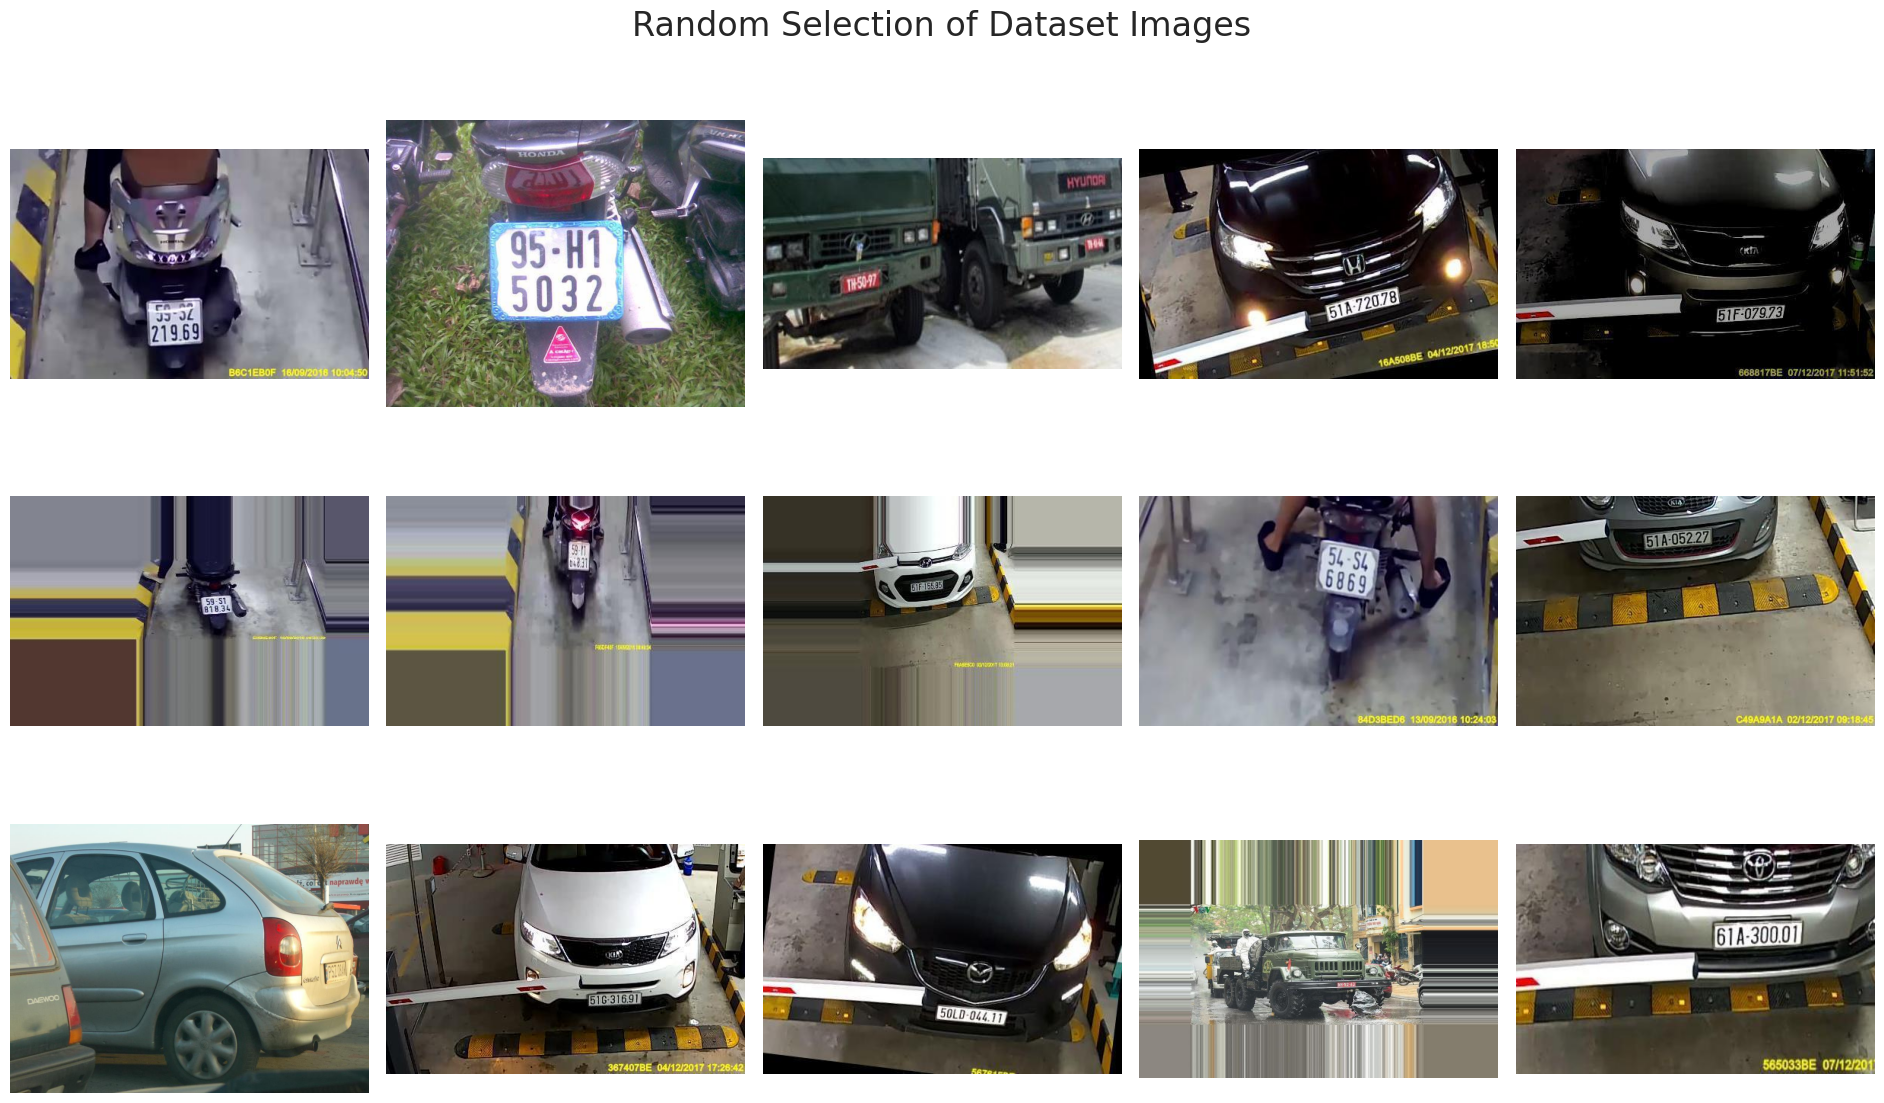

In [6]:
# Set the seed for the random number generator
random.seed(0)

# Create a list of image files
image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg')]

# Randomly select 15 images
random_images = random.sample(image_files, 15)

# Create a new figure
plt.figure(figsize=(19, 12))

# Loop through each image and display it in a 3x5 grid
for i, image_file in enumerate(random_images):
    image_path = os.path.join(train_images_path, image_file)
    image = Image.open(image_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

# Add a suptitle
plt.suptitle('Random Selection of Dataset Images', fontsize=24)

# Show the plot
plt.tight_layout()
plt.show()

# Deleting unnecessary variable to free up memory
del image_files

In [7]:
# Train the model on our custom dataset
results = model.train(
    # --- 기존 설정 ---
    data=yaml_file_path,      # Path to the dataset configuration file
    epochs=300,               # Number of epochs to train for
    imgsz=640,                # Size of input images as integer
    patience=10,              # Epochs to wait for no observable improvement for early stopping of training
    batch=64,                 # Number of images per batch
    optimizer='AdamW',        # Optimizer to use
    workers=8,
    device=0,                 # Device to run on, i.e. cuda device=0
    seed=42,                  # Random seed for reproducibility
    name='yolov8_augmented_run', # 새로운 학습이므로 이름 변경을 추천

    # --- 학습률 및 증강 수정/추가 ---
    lr0=0.001,                # (수정) 초기 학습률을 10배 높여 학습 속도 개선
    lrf=0.01,                 # (유지) 최종 학습률 (lr0 * lrf)
    dropout=0.25,             # (유지) Use dropout regularization
)

New https://pypi.org/project/ultralytics/8.3.179 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.176 🚀 Python-3.10.18 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5070 Ti, 15837MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/wockd/Desktop/trafic/plate_detect2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_augm

train: Scanning /home/wockd/Desktop/trafic/plate_detect2/train/labels... 7057 images, 5 backgrounds, 0 corrupt: 100%|██████████| 7057/7057 [00:02<00:00, 2769.05it/s]


train: New cache created: /home/wockd/Desktop/trafic/plate_detect2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 470.1±468.2 MB/s, size: 17.2 KB)


val: Scanning /home/wockd/Desktop/trafic/plate_detect2/valid/labels... 2048 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:00<00:00, 2137.50it/s]

val: New cache created: /home/wockd/Desktop/trafic/plate_detect2/valid/labels.cache


Plotting labels to runs/detect/yolov8_augmented_run3/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8_augmented_run3
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      7.81G      1.251      1.237      1.146         27        640: 100%|██████████| 111/111 [00:23<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.32it/s]

                   all       2048       2195      0.965      0.722      0.879      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/300      7.49G      1.195     0.7351        1.1         31        640: 100%|██████████| 111/111 [00:20<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.22it/s]

                   all       2048       2195      0.936      0.828      0.897      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      3/300      7.51G      1.214     0.7064      1.107         32        640: 100%|██████████| 111/111 [00:20<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.17it/s]

                   all       2048       2195      0.867      0.864      0.863      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      4/300      7.52G      1.196     0.6894      1.106         34        640: 100%|██████████| 111/111 [00:20<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]

                   all       2048       2195      0.934      0.896       0.93      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      5/300      7.54G      1.176     0.6366      1.099         31        640: 100%|██████████| 111/111 [00:20<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]

                   all       2048       2195      0.951      0.902      0.939      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      7.56G      1.171      0.615      1.091         35        640: 100%|██████████| 111/111 [00:21<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]

                   all       2048       2195      0.962      0.918      0.948      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      7/300      7.58G      1.142     0.5969      1.078         37        640: 100%|██████████| 111/111 [00:21<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.11it/s]

                   all       2048       2195      0.965      0.915      0.943      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      8/300      7.59G      1.145      0.592      1.087         30        640: 100%|██████████| 111/111 [00:20<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]

                   all       2048       2195      0.967      0.905       0.95      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      9/300      7.61G      1.132     0.5793      1.074         32        640: 100%|██████████| 111/111 [00:21<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.67it/s]

                   all       2048       2195      0.968       0.92      0.951      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     10/300      7.63G      1.131     0.5694      1.078         31        640: 100%|██████████| 111/111 [00:22<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.10it/s]

                   all       2048       2195      0.979      0.922      0.961      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     11/300      7.64G      1.116     0.5537      1.064         34        640: 100%|██████████| 111/111 [00:20<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]

                   all       2048       2195      0.967      0.918      0.955      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     12/300      7.66G       1.11     0.5417      1.066         45        640: 100%|██████████| 111/111 [00:20<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.22it/s]

                   all       2048       2195      0.963      0.903       0.94      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     13/300      7.68G      1.096     0.5396      1.061         32        640: 100%|██████████| 111/111 [00:21<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.06it/s]

                   all       2048       2195      0.977      0.919      0.957      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     14/300       7.7G      1.099     0.5349      1.058         39        640: 100%|██████████| 111/111 [00:20<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.02it/s]

                   all       2048       2195      0.973      0.923      0.959      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      7.71G      1.098     0.5314       1.06         37        640: 100%|██████████| 111/111 [00:21<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.16it/s]

                   all       2048       2195      0.969      0.924      0.957      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     16/300      7.73G      1.086     0.5202      1.055         32        640: 100%|██████████| 111/111 [00:20<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.18it/s]

                   all       2048       2195       0.98      0.931      0.963      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      7.89G      1.094     0.5212      1.054         29        640: 100%|██████████| 111/111 [00:21<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.22it/s]

                   all       2048       2195      0.986      0.923      0.961      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     18/300      7.55G      1.076     0.5147      1.047         39        640: 100%|██████████| 111/111 [00:21<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.13it/s]

                   all       2048       2195      0.979       0.93      0.964      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     19/300      7.55G      1.087     0.5102       1.05         25        640: 100%|██████████| 111/111 [00:20<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]

                   all       2048       2195       0.97      0.926       0.96      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     20/300      7.55G      1.077      0.508      1.053         32        640: 100%|██████████| 111/111 [00:20<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]

                   all       2048       2195      0.976      0.923      0.964      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     21/300      7.55G      1.081     0.5071      1.054         47        640: 100%|██████████| 111/111 [00:20<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.23it/s]

                   all       2048       2195      0.986      0.928      0.963      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     22/300      7.56G       1.07     0.4943      1.048         28        640: 100%|██████████| 111/111 [00:20<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]

                   all       2048       2195       0.98      0.929      0.963      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     23/300      7.57G      1.067      0.501      1.049         30        640: 100%|██████████| 111/111 [00:20<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]

                   all       2048       2195      0.987      0.928      0.966      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     24/300      7.59G      1.057     0.4899      1.041         23        640: 100%|██████████| 111/111 [00:20<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]

                   all       2048       2195      0.986      0.931      0.967      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     25/300      7.61G      1.066     0.4943      1.045         41        640: 100%|██████████| 111/111 [00:20<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]

                   all       2048       2195      0.973      0.927      0.965      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     26/300      7.63G      1.058      0.492      1.043         39        640: 100%|██████████| 111/111 [00:20<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]

                   all       2048       2195      0.981      0.933      0.968      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     27/300      7.64G      1.063      0.488      1.038         43        640: 100%|██████████| 111/111 [00:20<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.32it/s]

                   all       2048       2195       0.98      0.936       0.97      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     28/300      7.66G      1.049     0.4834      1.035         43        640: 100%|██████████| 111/111 [00:20<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]

                   all       2048       2195      0.985      0.924      0.965       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     29/300      7.68G       1.06     0.4827      1.041         30        640: 100%|██████████| 111/111 [00:20<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]

                   all       2048       2195      0.987      0.936      0.972       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     30/300       7.7G       1.05     0.4833       1.04         27        640: 100%|██████████| 111/111 [00:20<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]

                   all       2048       2195      0.985      0.933      0.971      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     31/300      7.71G      1.042     0.4737      1.036         38        640: 100%|██████████| 111/111 [00:20<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]

                   all       2048       2195      0.981      0.942      0.972      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     32/300      7.73G      1.042     0.4748      1.037         32        640: 100%|██████████| 111/111 [00:20<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]

                   all       2048       2195       0.98      0.938      0.966      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      7.84G      1.039     0.4701      1.032         39        640: 100%|██████████| 111/111 [00:20<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]

                   all       2048       2195      0.984      0.942      0.975      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     34/300      7.54G      1.035     0.4682      1.032         30        640: 100%|██████████| 111/111 [00:20<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]

                   all       2048       2195      0.974      0.942      0.969      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     35/300      7.54G      1.033     0.4678       1.03         37        640: 100%|██████████| 111/111 [00:20<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.32it/s]

                   all       2048       2195      0.984      0.934      0.969      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     36/300      7.54G      1.028      0.468      1.028         30        640: 100%|██████████| 111/111 [00:20<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]

                   all       2048       2195      0.981      0.938      0.971      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     37/300      7.54G      1.029     0.4652      1.033         32        640: 100%|██████████| 111/111 [00:20<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]

                   all       2048       2195      0.987      0.934      0.972      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     38/300      7.56G      1.032      0.463      1.026         34        640: 100%|██████████| 111/111 [00:20<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]

                   all       2048       2195       0.98      0.935      0.968        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     39/300      7.58G      1.021     0.4588      1.021         35        640: 100%|██████████| 111/111 [00:20<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]

                   all       2048       2195      0.981      0.942      0.974      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     40/300      7.59G      1.018     0.4585      1.027         29        640: 100%|██████████| 111/111 [00:20<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]

                   all       2048       2195      0.978      0.946      0.971      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     41/300      7.61G      1.016     0.4517      1.023         33        640: 100%|██████████| 111/111 [00:20<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]

                   all       2048       2195      0.988      0.937       0.97      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     42/300      7.63G       1.01     0.4534      1.022         35        640: 100%|██████████| 111/111 [00:20<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]

                   all       2048       2195      0.987      0.937       0.97      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     43/300      7.64G      1.013     0.4541      1.019         38        640: 100%|██████████| 111/111 [00:20<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]

                   all       2048       2195      0.982      0.937      0.971      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     44/300      7.66G      1.014     0.4513      1.023         35        640: 100%|██████████| 111/111 [00:20<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]

                   all       2048       2195      0.983      0.938      0.971      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     45/300      7.68G       1.01     0.4516      1.018         32        640: 100%|██████████| 111/111 [00:20<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]

                   all       2048       2195      0.986       0.94      0.973      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     46/300       7.7G      1.013     0.4483      1.022         40        640: 100%|██████████| 111/111 [00:20<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]

                   all       2048       2195      0.982      0.944      0.971      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     47/300      7.71G     0.9998     0.4395      1.016         38        640: 100%|██████████| 111/111 [00:20<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]

                   all       2048       2195      0.982      0.948      0.975        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     48/300      7.73G      1.004     0.4432      1.019         31        640: 100%|██████████| 111/111 [00:20<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]

                   all       2048       2195      0.984      0.942      0.973      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      7.83G          1     0.4427      1.015         35        640: 100%|██████████| 111/111 [00:20<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]

                   all       2048       2195      0.984      0.942      0.974      0.705
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 39, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

49 epochs completed in 0.336 hours.


Optimizer stripped from runs/detect/yolov8_augmented_run3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_augmented_run3/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_augmented_run3/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.10.18 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5070 Ti, 15837MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]


                   all       2048       2195      0.981      0.942      0.974      0.714
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/yolov8_augmented_run3


In [8]:
# Define the path to the directory
post_training_files_path = '/home/wockd/Desktop/trafic/runs/detect/yolov8_augmented_run3'

# List the files in the directory
!ls {post_training_files_path}

args.yaml			 labels_correlogram.jpg  val_batch0_labels.jpg
BoxF1_curve.png			 labels.jpg		 val_batch0_pred.jpg
BoxP_curve.png			 results.csv		 val_batch1_labels.jpg
BoxPR_curve.png			 results.png		 val_batch1_pred.jpg
BoxR_curve.png			 train_batch0.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch1.jpg	 val_batch2_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 weights


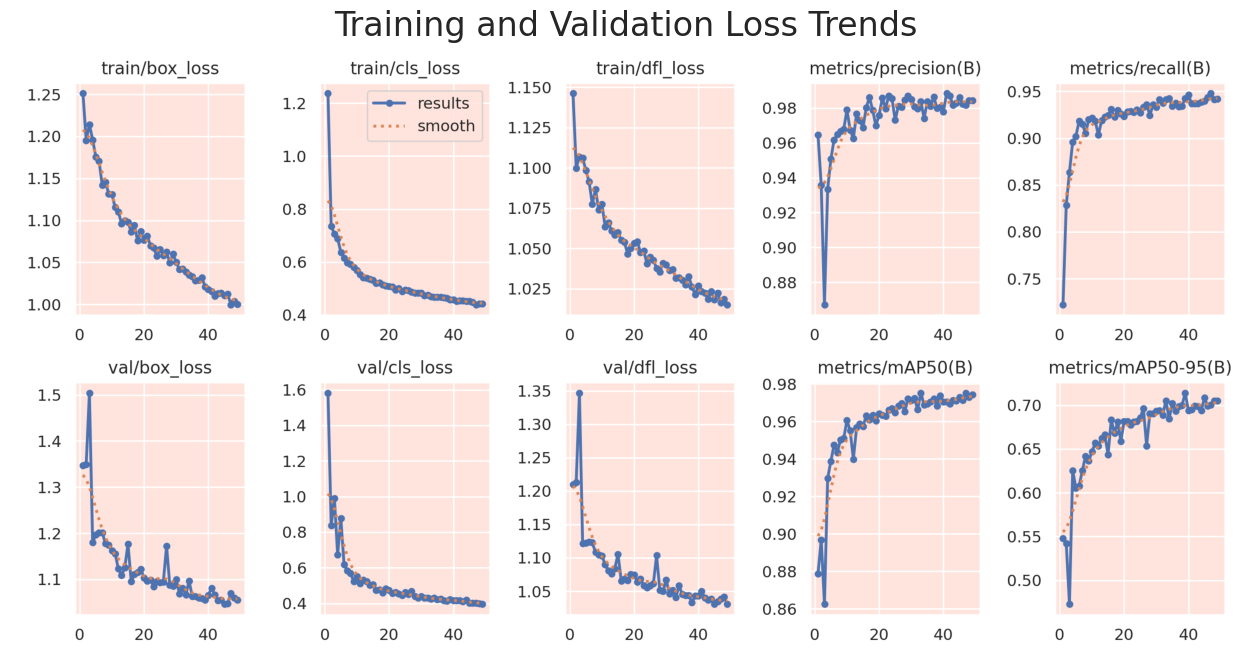

In [9]:
# Create the full file path by joining the directory path with the filename
results_file_path = os.path.join(post_training_files_path, 'results.png')

# Read the image using cv2
image = cv2.imread(results_file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Display the image using matplotlib
plt.figure(figsize=(20, 8))
plt.imshow(image)
plt.title('Training and Validation Loss Trends', fontsize=24)
plt.axis('off') 
plt.show()

In [11]:
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='test')

Ultralytics 8.3.176 🚀 Python-3.10.18 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 5070 Ti, 15837MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 323.8±166.7 MB/s, size: 45.2 KB)


val: Scanning /home/wockd/Desktop/trafic/plate_detect2/test/labels... 1020 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1020/1020 [00:00<00:00, 3830.65it/s]

val: New cache created: /home/wockd/Desktop/trafic/plate_detect2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:02<00:00, 21.90it/s]


                   all       1020       1085      0.988      0.934      0.977      0.721
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val4


In [12]:
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFrame
metrics_df.round(3)

Metric Value
metrics/precision(B)         0.988
metrics/recall(B)            0.934
metrics/mAP50(B)             0.977
metrics/mAP50-95(B)          0.721
fitness                      0.747


image 1/1 /home/wockd/Desktop/trafic/plate_detect2/valid/images/CarLongPlateGen922_jpg.rf.02a374bdca69175e3f5441fd37eecd95.jpg: 416x640 1 License_Plate, 15.7ms
Speed: 0.9ms preprocess, 15.7ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /home/wockd/Desktop/trafic/plate_detect2/valid/images/pic_081_jpg.rf.b11207444fd99521cdbc35edc37d613e.jpg: 352x640 1 License_Plate, 15.6ms
Speed: 0.7ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /home/wockd/Desktop/trafic/plate_detect2/valid/images/CarLongPlate354_jpg.rf.10456faff9d2c119986a0c6c8187723d.jpg: 416x640 1 License_Plate, 4.2ms
Speed: 0.8ms preprocess, 4.2ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /home/wockd/Desktop/trafic/plate_detect2/valid/images/Cars334_png_jpg.rf.6ba0704682d9cb4460104ce5c0662e40.jpg: 352x640 1 License_Plate, 3.9ms
Speed: 0.7ms preprocess, 3.9ms inference, 0.8ms postprocess per image at shape (1, 3, 352

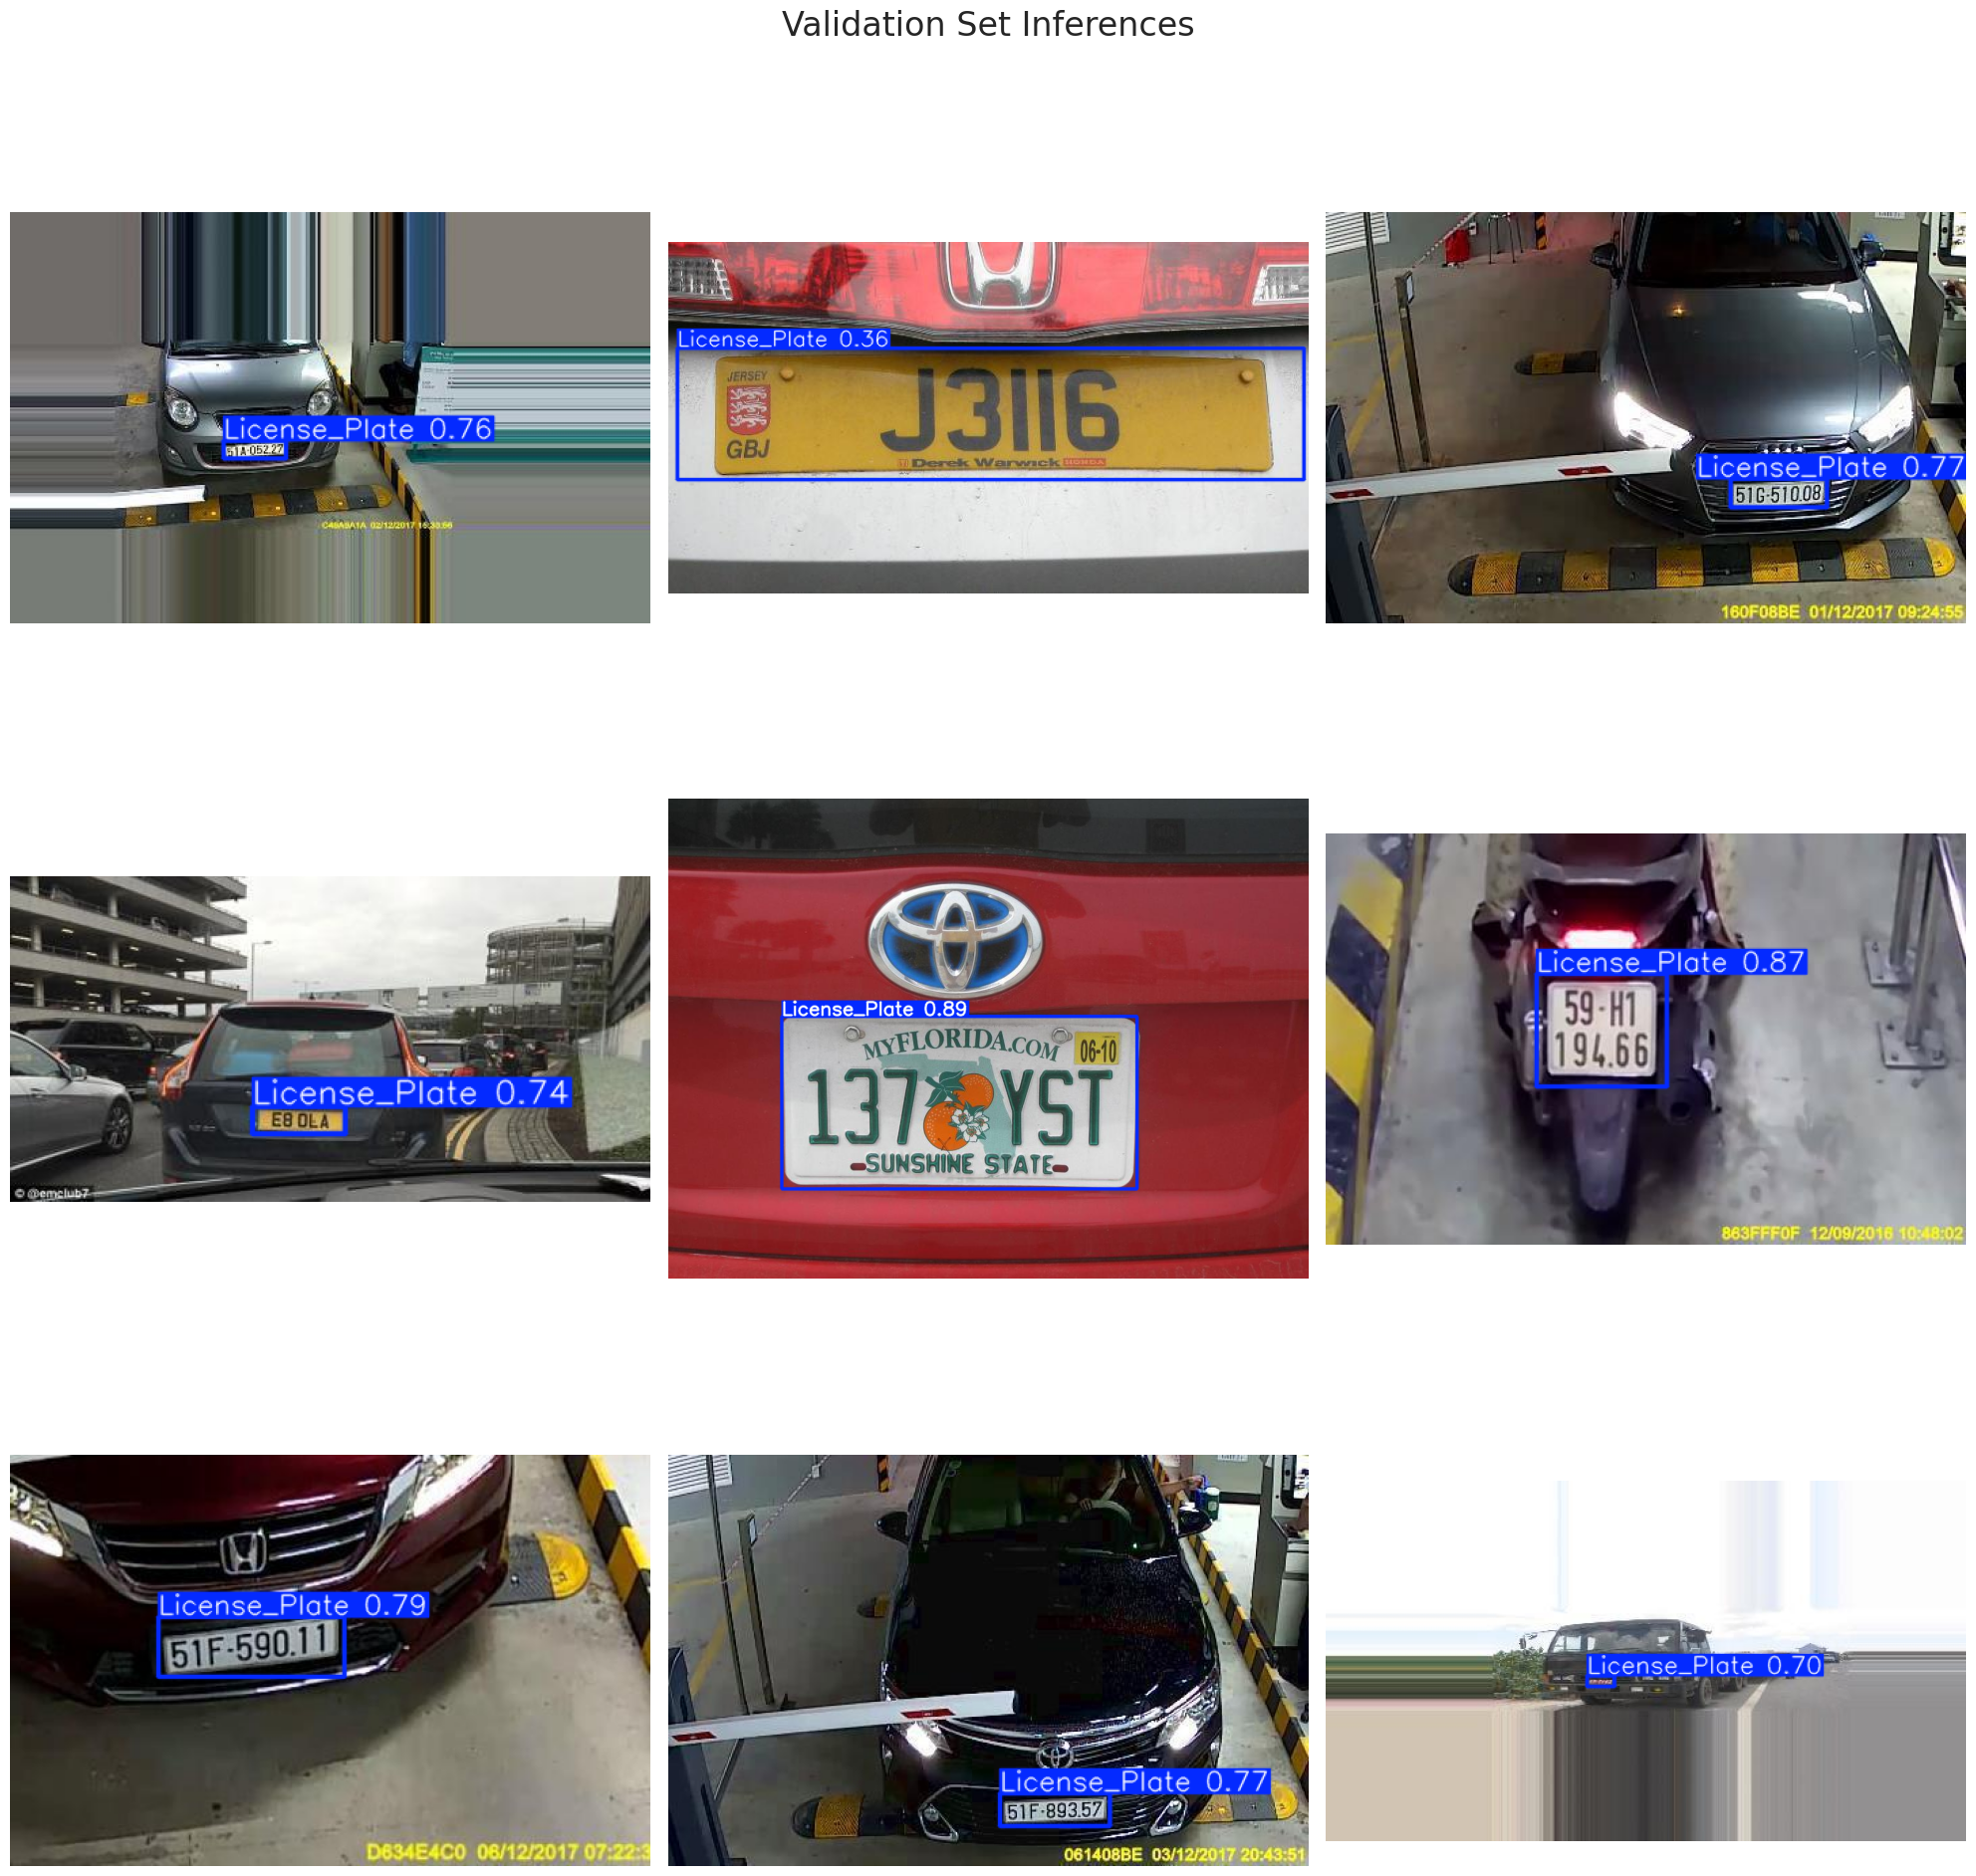

In [13]:
# Define the path to the validation images
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# List all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Select 9 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 9)]

# Initialize the subplot
fig, axes = plt.subplots(3, 3, figsize=(20, 21))
fig.suptitle('Validation Set Inferences', fontsize=24)

# Perform inference on each selected image and display it
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640)
    annotated_image = results[0].plot()
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [14]:
import cv2
from ultralytics import YOLO
from tqdm import tqdm # 진행 상황을 보여주기 위한 라이브러리

# --- 설정 ---
# 'best_model'은 이미 학습된 YOLO 모델이 로드된 변수라고 가정합니다.
# 예: best_model = YOLO('runs/detect/.../weights/best.pt')

# 추론할 원본 비디오 경로
input_video_path = '/home/wockd/Desktop/trafic/test.mp4'

# 최종 저장될 mp4 파일 경로
output_video_path = 'final_output3.mp4'

# --- 실행 ---
# 비디오 캡처 객체 생성
cap = cv2.VideoCapture(input_video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# 비디오 저장(VideoWriter) 객체 설정
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # mp4 코덱
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

print("추론 및 mp4 저장을 시작합니다...")

# 모델 추론 실행 (stream=True로 설정하여 한 프레임씩 처리)
results = best_model.predict(source=input_video_path, stream=True)

# 각 프레임의 결과에 대해 반복
for result in tqdm(results, total=total_frames, desc="Processing video"):
    # 결과 프레임에 바운딩 박스 등 주석을 그림
    annotated_frame = result.plot()
    
    # mp4 파일에 현재 프레임을 씀
    video_writer.write(annotated_frame)

# 모든 작업이 끝나면 객체들을 해제
cap.release()
video_writer.release()
cv2.destroyAllWindows()

print("\n✅ 작업 완료!")
print(f"최종 결과 영상이 '{output_video_path}' 파일로 저장되었습니다.")

추론 및 mp4 저장을 시작합니다...


Processing video:   0%|          | 0/649 [00:00<?, ?it/s]

video 1/1 (frame 1/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 21.8ms
video 1/1 (frame 2/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.0ms
video 1/1 (frame 3/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms


Processing video:   0%|          | 3/649 [00:00<00:22, 29.23it/s]

video 1/1 (frame 4/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 5/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.6ms
video 1/1 (frame 6/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 7/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 8/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 9/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 10/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 11/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 12/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 13/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 14/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no de

Processing video:   2%|▏         | 14/649 [00:00<00:08, 75.50it/s]

video 1/1 (frame 15/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 16/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.1ms
video 1/1 (frame 17/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 18/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 19/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 20/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 21/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 22/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 23/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 24/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 25/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 

Processing video:   4%|▍         | 26/649 [00:00<00:06, 93.74it/s]

video 1/1 (frame 27/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 28/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 29/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 30/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 31/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 32/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 33/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 34/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 35/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 36/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 37/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 

Processing video:   6%|▌         | 38/649 [00:00<00:05, 102.25it/s]

video 1/1 (frame 39/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.8ms
video 1/1 (frame 40/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 6.4ms
video 1/1 (frame 41/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 42/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 43/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 44/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 45/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 46/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.6ms
video 1/1 (frame 47/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 48/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 49/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 

Processing video:   8%|▊         | 49/649 [00:00<00:05, 102.57it/s]

video 1/1 (frame 50/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 51/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 52/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 53/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 54/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 55/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 56/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 57/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 58/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 59/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 60/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 

Processing video:   9%|▉         | 61/649 [00:00<00:05, 105.69it/s]

video 1/1 (frame 62/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 63/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.8ms
video 1/1 (frame 64/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 65/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 66/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 67/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 68/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.1ms
video 1/1 (frame 69/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 70/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 71/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 72/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 

Processing video:  11%|█         | 73/649 [00:00<00:05, 107.81it/s]

video 1/1 (frame 74/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 75/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 76/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 77/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 78/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 79/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 80/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.9ms
video 1/1 (frame 81/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 82/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 83/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 84/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 

Processing video:  13%|█▎        | 85/649 [00:00<00:05, 109.39it/s]

video 1/1 (frame 86/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 87/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 88/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 89/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 90/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 91/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.7ms
video 1/1 (frame 92/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 93/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 94/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 95/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 96/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 

Processing video:  15%|█▍        | 97/649 [00:00<00:04, 111.10it/s]

video 1/1 (frame 98/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 99/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 100/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 101/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 102/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 103/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 104/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 105/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 106/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 107/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 108/649) /home/wockd/Desktop/trafic/test.mp4:

Processing video:  17%|█▋        | 109/649 [00:01<00:04, 110.78it/s]

video 1/1 (frame 110/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 111/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 112/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 113/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 114/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 115/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 116/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 117/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 118/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 119/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 120/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  19%|█▊        | 121/649 [00:01<00:04, 109.01it/s]

video 1/1 (frame 122/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 123/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 124/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.3ms
video 1/1 (frame 125/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 126/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 127/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 128/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 129/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.9ms
video 1/1 (frame 130/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 131/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.5ms
video 1/1 (frame 132/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  20%|██        | 132/649 [00:01<00:04, 104.36it/s]

video 1/1 (frame 133/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 134/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.5ms
video 1/1 (frame 135/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 136/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 137/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 138/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 139/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 140/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 141/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 142/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 143/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  22%|██▏       | 143/649 [00:01<00:04, 103.63it/s]

video 1/1 (frame 144/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 145/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.3ms
video 1/1 (frame 146/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 147/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 148/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 149/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 150/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 151/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 152/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 153/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 154/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  24%|██▎       | 154/649 [00:01<00:04, 104.88it/s]

video 1/1 (frame 155/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.5ms
video 1/1 (frame 156/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 157/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 158/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 159/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 160/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 161/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 162/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 163/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 164/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 165/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  25%|██▌       | 165/649 [00:01<00:04, 104.75it/s]

video 1/1 (frame 166/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.8ms
video 1/1 (frame 167/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 6.2ms
video 1/1 (frame 168/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 169/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 170/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.7ms
video 1/1 (frame 171/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 172/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 173/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 174/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 175/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 176/649) /home/wockd/Desktop/trafic/test.m

Processing video:  27%|██▋       | 176/649 [00:01<00:04, 101.79it/s]

video 1/1 (frame 177/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 178/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 179/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 180/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 181/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 182/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 183/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 184/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 185/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 186/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.0ms
video 1/1 (frame 187/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  29%|██▉       | 187/649 [00:01<00:04, 102.56it/s]

video 1/1 (frame 188/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 189/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 190/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 191/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 4.0ms
video 1/1 (frame 192/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 193/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 194/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 195/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 196/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 197/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 198/649) /home/wockd/Desktop/trafic/test.m

Processing video:  31%|███       | 198/649 [00:01<00:04, 101.01it/s]

video 1/1 (frame 199/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 200/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 201/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 202/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 203/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 204/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 205/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 206/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.9ms
video 1/1 (frame 207/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 208/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 209/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  32%|███▏      | 209/649 [00:02<00:04, 101.59it/s]

video 1/1 (frame 210/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.1ms
video 1/1 (frame 211/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.7ms
video 1/1 (frame 212/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.5ms
video 1/1 (frame 213/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.0ms
video 1/1 (frame 214/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 215/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 216/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 217/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 218/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 219/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 220/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  34%|███▍      | 220/649 [00:02<00:04, 98.32it/s] 

video 1/1 (frame 221/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 222/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 223/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 224/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 225/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.9ms
video 1/1 (frame 226/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 227/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 228/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 229/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 230/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 231/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  36%|███▌      | 231/649 [00:02<00:04, 99.75it/s]

video 1/1 (frame 232/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 233/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 234/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 235/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 236/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 237/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 238/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 239/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 240/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 241/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 242/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  37%|███▋      | 242/649 [00:02<00:03, 102.15it/s]

video 1/1 (frame 243/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 244/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 245/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 246/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 247/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 248/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 249/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 250/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 251/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 252/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 253/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  39%|███▉      | 253/649 [00:02<00:03, 104.02it/s]

video 1/1 (frame 254/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 255/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 256/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 257/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 258/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 259/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 260/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 261/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 262/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 263/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 264/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  41%|████      | 264/649 [00:02<00:03, 104.61it/s]

video 1/1 (frame 265/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 266/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 6.9ms
video 1/1 (frame 267/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 268/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.0ms
video 1/1 (frame 269/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 270/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 271/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 272/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 273/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 274/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.8ms
video 1/1 (frame 275/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  42%|████▏     | 275/649 [00:02<00:03, 101.87it/s]

video 1/1 (frame 276/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.4ms
video 1/1 (frame 277/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 6.9ms
video 1/1 (frame 278/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.0ms
video 1/1 (frame 279/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.8ms
video 1/1 (frame 280/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.9ms
video 1/1 (frame 281/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.6ms
video 1/1 (frame 282/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.7ms
video 1/1 (frame 283/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.8ms
video 1/1 (frame 284/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.0ms
video 1/1 (frame 285/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.6ms
video 1/1 (frame 286/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  44%|████▍     | 286/649 [00:02<00:03, 93.91it/s] 

video 1/1 (frame 287/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 288/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 289/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 4.2ms
video 1/1 (frame 290/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.3ms
video 1/1 (frame 291/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 4.0ms
video 1/1 (frame 292/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 293/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 294/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 4.1ms
video 1/1 (frame 295/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.1ms
video 1/1 (frame 296/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms


Processing video:  46%|████▌     | 296/649 [00:02<00:03, 94.43it/s]

video 1/1 (frame 297/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 298/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.7ms
video 1/1 (frame 299/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.3ms
video 1/1 (frame 300/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.3ms
video 1/1 (frame 301/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 302/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 303/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 4.0ms
video 1/1 (frame 304/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 305/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 306/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.3ms


Processing video:  47%|████▋     | 306/649 [00:03<00:03, 94.79it/s]

video 1/1 (frame 307/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 308/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 309/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 310/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 311/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.6ms
video 1/1 (frame 312/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.7ms
video 1/1 (frame 313/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 314/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 315/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 316/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms


Processing video:  49%|████▊     | 316/649 [00:03<00:03, 95.44it/s]

video 1/1 (frame 317/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 318/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 319/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 320/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 321/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.6ms
video 1/1 (frame 322/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 323/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 324/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 325/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 326/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms


Processing video:  50%|█████     | 326/649 [00:03<00:03, 95.96it/s]

video 1/1 (frame 327/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 328/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 329/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 4.3ms
video 1/1 (frame 330/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 331/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 332/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 333/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 334/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 335/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 336/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms


Processing video:  52%|█████▏    | 336/649 [00:03<00:03, 96.37it/s]

video 1/1 (frame 337/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 338/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 339/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 340/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 341/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 342/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 343/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 344/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.2ms
video 1/1 (frame 345/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 346/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms


Processing video:  53%|█████▎    | 346/649 [00:03<00:03, 96.88it/s]

video 1/1 (frame 347/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 348/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.3ms
video 1/1 (frame 349/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.4ms
video 1/1 (frame 350/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.4ms
video 1/1 (frame 351/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.3ms
video 1/1 (frame 352/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 353/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 354/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 355/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 356/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms


Processing video:  55%|█████▍    | 356/649 [00:03<00:03, 94.22it/s]

video 1/1 (frame 357/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 358/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 359/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 360/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 361/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 3.9ms
video 1/1 (frame 362/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 4.0ms
video 1/1 (frame 363/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 3.9ms
video 1/1 (frame 364/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 3.9ms
video 1/1 (frame 365/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 3.9ms
video 1/1 (frame 366/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 3.9ms


Processing video:  56%|█████▋    | 366/649 [00:03<00:02, 95.65it/s]

video 1/1 (frame 367/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 368/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 369/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 370/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 371/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 4.0ms
video 1/1 (frame 372/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 3.9ms
video 1/1 (frame 373/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 3.9ms
video 1/1 (frame 374/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 375/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 376/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms


Processing video:  58%|█████▊    | 376/649 [00:03<00:02, 96.56it/s]

video 1/1 (frame 377/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 378/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 379/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 380/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.1ms
video 1/1 (frame 381/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 382/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 383/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.7ms
video 1/1 (frame 384/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 385/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 386/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms


Processing video:  59%|█████▉    | 386/649 [00:03<00:02, 96.63it/s]

video 1/1 (frame 387/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 388/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 2 License_Plates, 4.1ms
video 1/1 (frame 389/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 390/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 391/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 392/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 393/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 394/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 395/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 396/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 397/649) /home/wockd/Desktop/trafic/test.m

Processing video:  61%|██████    | 397/649 [00:03<00:02, 98.44it/s]

video 1/1 (frame 398/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 399/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 400/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 401/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 402/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 403/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 404/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 405/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.8ms
video 1/1 (frame 406/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 407/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms


Processing video:  63%|██████▎   | 407/649 [00:04<00:02, 98.26it/s]

video 1/1 (frame 408/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 409/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.3ms
video 1/1 (frame 410/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 411/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 412/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 413/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.6ms
video 1/1 (frame 414/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 415/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 416/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 417/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms


Processing video:  64%|██████▍   | 417/649 [00:04<00:02, 98.17it/s]

video 1/1 (frame 418/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 419/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.7ms
video 1/1 (frame 420/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 421/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 422/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 423/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 424/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 425/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.1ms
video 1/1 (frame 426/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 427/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms


Processing video:  66%|██████▌   | 427/649 [00:04<00:02, 98.03it/s]

video 1/1 (frame 428/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 429/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.3ms
video 1/1 (frame 430/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.5ms
video 1/1 (frame 431/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 432/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 433/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 434/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 435/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 436/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 437/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms


Processing video:  67%|██████▋   | 437/649 [00:04<00:02, 96.53it/s]

video 1/1 (frame 438/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 439/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 440/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 441/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 442/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 5.4ms
video 1/1 (frame 443/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 444/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 445/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 446/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 447/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms


Processing video:  69%|██████▉   | 447/649 [00:04<00:02, 96.25it/s]

video 1/1 (frame 448/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 449/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.4ms
video 1/1 (frame 450/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 451/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 452/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.2ms
video 1/1 (frame 453/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 454/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 455/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 456/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 457/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 458/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  71%|███████   | 458/649 [00:04<00:01, 97.67it/s]

video 1/1 (frame 459/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 460/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 461/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 462/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 463/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 464/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 465/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 466/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 467/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 468/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 469/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  72%|███████▏  | 469/649 [00:04<00:01, 100.81it/s]

video 1/1 (frame 470/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 471/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.1ms
video 1/1 (frame 472/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 473/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.9ms
video 1/1 (frame 474/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 475/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 476/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 477/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 478/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 479/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 480/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  74%|███████▍  | 480/649 [00:04<00:01, 99.53it/s] 

video 1/1 (frame 481/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 482/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.0ms
video 1/1 (frame 483/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 4.9ms
video 1/1 (frame 484/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 485/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 486/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 1 License_Plate, 3.9ms
video 1/1 (frame 487/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 488/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 489/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.8ms
video 1/1 (frame 490/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 491/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  76%|███████▌  | 491/649 [00:04<00:01, 100.39it/s]

video 1/1 (frame 492/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 493/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 494/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 495/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 496/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 497/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 498/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 499/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 500/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 501/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 502/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  78%|███████▊  | 503/649 [00:05<00:01, 104.17it/s]

video 1/1 (frame 504/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 505/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 506/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 507/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 508/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 509/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 510/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 511/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 512/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 513/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 514/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  79%|███████▉  | 514/649 [00:05<00:01, 104.99it/s]

video 1/1 (frame 515/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.3ms
video 1/1 (frame 516/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 6.5ms
video 1/1 (frame 517/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 6.1ms
video 1/1 (frame 518/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 6.1ms
video 1/1 (frame 519/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.9ms
video 1/1 (frame 520/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 521/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.5ms
video 1/1 (frame 522/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 523/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 524/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 525/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  81%|████████  | 525/649 [00:05<00:01, 101.15it/s]

video 1/1 (frame 526/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 527/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.5ms
video 1/1 (frame 528/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 529/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 530/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 531/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.8ms
video 1/1 (frame 532/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 533/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 534/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 535/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 536/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  83%|████████▎ | 536/649 [00:05<00:01, 103.51it/s]

video 1/1 (frame 537/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 538/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 539/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 540/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 541/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 542/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 543/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 544/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 545/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 546/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 547/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  84%|████████▍ | 547/649 [00:05<00:00, 104.85it/s]

video 1/1 (frame 548/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 549/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 550/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 551/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.1ms
video 1/1 (frame 552/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 553/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 554/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 555/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 556/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 557/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 558/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  86%|████████▌ | 558/649 [00:05<00:00, 105.20it/s]

video 1/1 (frame 559/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 560/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 561/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 562/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 563/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 564/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 565/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 566/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 567/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 568/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 569/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  88%|████████▊ | 570/649 [00:05<00:00, 106.23it/s]

video 1/1 (frame 571/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 572/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 573/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 574/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 575/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 576/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 577/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 578/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 579/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 580/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 581/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  90%|████████▉ | 582/649 [00:05<00:00, 107.01it/s]

video 1/1 (frame 583/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 584/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 585/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 586/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.6ms
video 1/1 (frame 587/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.5ms
video 1/1 (frame 588/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 589/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 590/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 591/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 592/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 593/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  91%|█████████▏| 593/649 [00:05<00:00, 106.86it/s]

video 1/1 (frame 594/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.5ms
video 1/1 (frame 595/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 596/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 597/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.5ms
video 1/1 (frame 598/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.3ms
video 1/1 (frame 599/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 600/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.0ms
video 1/1 (frame 601/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 602/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 603/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 604/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  93%|█████████▎| 604/649 [00:05<00:00, 105.41it/s]

video 1/1 (frame 605/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 606/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.5ms
video 1/1 (frame 607/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 608/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 609/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 610/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 611/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.9ms
video 1/1 (frame 612/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 613/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 614/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 615/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  95%|█████████▍| 615/649 [00:06<00:00, 105.45it/s]

video 1/1 (frame 616/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 617/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 618/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 619/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 620/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 621/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 622/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 623/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 624/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 625/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 626/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  96%|█████████▋| 626/649 [00:06<00:00, 106.02it/s]

video 1/1 (frame 627/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 628/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 629/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 630/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 631/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 632/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 633/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 634/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 635/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 636/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 637/649) /home/wockd/Desktop/trafic/test.mp

Processing video:  98%|█████████▊| 637/649 [00:06<00:00, 106.70it/s]

video 1/1 (frame 638/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 639/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.4ms
video 1/1 (frame 640/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.2ms
video 1/1 (frame 641/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.3ms
video 1/1 (frame 642/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.0ms
video 1/1 (frame 643/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
video 1/1 (frame 644/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 645/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 4.1ms
video 1/1 (frame 646/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 5.2ms
video 1/1 (frame 647/649) /home/wockd/Desktop/trafic/test.mp4: 640x384 (no detections), 3.9ms
Speed: 0.9ms preprocess, 4.2ms inference, 0.7ms postprocess 

Processing video: 100%|█████████▉| 647/649 [00:06<00:00, 101.22it/s]



✅ 작업 완료!
최종 결과 영상이 'final_output3.mp4' 파일로 저장되었습니다.
